In [2]:
import anndata
import pandas as pd
import numpy as np
import scanpy as sc

In [23]:
adata = sc.read_h5ad('../data/pdac/processed.h5ad')
adata

AnnData object with n_obs × n_vars = 43022 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.1.2', 'sample_id', 'cell_type'
    obsm: 'X_umap'

In [4]:
df = pd.read_csv('../data/scvarscan/01042021/sc_variants.txt', sep='\t')
df

,barcode,variant_id,gene,variant,ref_count,alt_count,sample,vaf,total_count
0,AGACGTTGTAGCACGA-1,1_9741129_A_C,CLSTN1,p.I495R,12,0,1555-tumor,0.0,12
1,CACACAAGTGTGACCC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27
2,CAGCAGCCACTATCTT-1,1_9741129_A_C,CLSTN1,p.I495R,9,0,1555-tumor,0.0,9
3,ACTTGTTCAGCCACCA-1,1_9741129_A_C,CLSTN1,p.I495R,20,0,1555-tumor,0.0,20
4,TACCTATCACTTCTGC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27
...,...,...,...,...,...,...,...,...,...
514222,GGCAATTGTCTCCACT-1,9_77922179_G_C,NaN,NaN,4,0,wu24,0.0,4
514223,CCTACCAGTGATGTCT-1,9_77922179_G_C,NaN,NaN,5,0,wu24,0.0,5
514224,CTTACCGCAGACAAGC-1,9_77922179_G_C,NaN,NaN,2,0,wu24,0.0,2
514225,CCACTACCAGGCTCAC-1,9_77922179_G_C,NaN,NaN,1,0,wu24,0.0,1


In [7]:
df.index = [f'{s}_{b}' for b, s in zip(df['barcode'], df['sample'])]
df

,barcode,variant_id,gene,variant,ref_count,alt_count,sample,vaf,total_count
1555-tumor_AGACGTTGTAGCACGA-1,AGACGTTGTAGCACGA-1,1_9741129_A_C,CLSTN1,p.I495R,12,0,1555-tumor,0.0,12
1555-tumor_CACACAAGTGTGACCC-1,CACACAAGTGTGACCC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27
1555-tumor_CAGCAGCCACTATCTT-1,CAGCAGCCACTATCTT-1,1_9741129_A_C,CLSTN1,p.I495R,9,0,1555-tumor,0.0,9
1555-tumor_ACTTGTTCAGCCACCA-1,ACTTGTTCAGCCACCA-1,1_9741129_A_C,CLSTN1,p.I495R,20,0,1555-tumor,0.0,20
1555-tumor_TACCTATCACTTCTGC-1,TACCTATCACTTCTGC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27
...,...,...,...,...,...,...,...,...,...
wu24_GGCAATTGTCTCCACT-1,GGCAATTGTCTCCACT-1,9_77922179_G_C,NaN,NaN,4,0,wu24,0.0,4
wu24_CCTACCAGTGATGTCT-1,CCTACCAGTGATGTCT-1,9_77922179_G_C,NaN,NaN,5,0,wu24,0.0,5
wu24_CTTACCGCAGACAAGC-1,CTTACCGCAGACAAGC-1,9_77922179_G_C,NaN,NaN,2,0,wu24,0.0,2
wu24_CCACTACCAGGCTCAC-1,CCACTACCAGGCTCAC-1,9_77922179_G_C,NaN,NaN,1,0,wu24,0.0,1


In [8]:
df['variant_name'] = [f'{g}_{v}' for g, v in zip(df['gene'], df['variant'])]
df

,barcode,variant_id,gene,variant,ref_count,alt_count,sample,vaf,total_count,variant_name
1555-tumor_AGACGTTGTAGCACGA-1,AGACGTTGTAGCACGA-1,1_9741129_A_C,CLSTN1,p.I495R,12,0,1555-tumor,0.0,12,CLSTN1_p.I495R
1555-tumor_CACACAAGTGTGACCC-1,CACACAAGTGTGACCC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27,CLSTN1_p.I495R
1555-tumor_CAGCAGCCACTATCTT-1,CAGCAGCCACTATCTT-1,1_9741129_A_C,CLSTN1,p.I495R,9,0,1555-tumor,0.0,9,CLSTN1_p.I495R
1555-tumor_ACTTGTTCAGCCACCA-1,ACTTGTTCAGCCACCA-1,1_9741129_A_C,CLSTN1,p.I495R,20,0,1555-tumor,0.0,20,CLSTN1_p.I495R
1555-tumor_TACCTATCACTTCTGC-1,TACCTATCACTTCTGC-1,1_9741129_A_C,CLSTN1,p.I495R,27,0,1555-tumor,0.0,27,CLSTN1_p.I495R
...,...,...,...,...,...,...,...,...,...,...
wu24_GGCAATTGTCTCCACT-1,GGCAATTGTCTCCACT-1,9_77922179_G_C,NaN,NaN,4,0,wu24,0.0,4,nan_nan
wu24_CCTACCAGTGATGTCT-1,CCTACCAGTGATGTCT-1,9_77922179_G_C,NaN,NaN,5,0,wu24,0.0,5,nan_nan
wu24_CTTACCGCAGACAAGC-1,CTTACCGCAGACAAGC-1,9_77922179_G_C,NaN,NaN,2,0,wu24,0.0,2,nan_nan
wu24_CCACTACCAGGCTCAC-1,CCACTACCAGGCTCAC-1,9_77922179_G_C,NaN,NaN,1,0,wu24,0.0,1,nan_nan


In [10]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.1.2,sample_id,cell_type
1555-tumor_AAACCTGAGACCTAGG-1,1555-tumor,2931.0,1169,5.834186,2227.0,1167,20,25,25,1555-tumor,CD8 T
1555-tumor_AAACCTGAGTGCGTGA-1,1555-tumor,21400.0,4292,6.107477,2085.0,934,2,11,11,1555-tumor,Malignant
1555-tumor_AAACCTGCATCCCACT-1,1555-tumor,515.0,340,4.660194,1370.0,382,3,9,9,1555-tumor,CD8 T
1555-tumor_AAACCTGGTCATGCAT-1,1555-tumor,1586.0,689,19.104666,1709.0,689,19,13,13,1555-tumor,B cell
1555-tumor_AAACCTGTCCGGGTGT-1,1555-tumor,2631.0,1049,5.929304,2141.0,1049,20,25,25,1555-tumor,CD8 T
...,...,...,...,...,...,...,...,...,...,...,...
wu24_TTTCCTCGTACAGTGG-1,wu24,4066.0,1413,0.098377,2404.0,1281,2,11,11,wu24,Malignant
wu24_TTTCCTCGTGTGACGA-1,wu24,4065.0,2115,9.151292,2805.0,1984,2,11,11,wu24,Malignant
wu24_TTTGGTTAGAACTGTA-1,wu24,6804.0,2796,4.761905,1809.0,997,2,11,11,wu24,Malignant
wu24_TTTGGTTAGATGTGGC-1,wu24,1324.0,842,8.610272,1467.0,842,24,4,4,wu24,CAF


In [60]:
def mutation_status(vaf, d, v):
    if d < 20: return 'low depth'
    if vaf < .05: return 'w/t'
    return v

In [61]:
adata = sc.read_h5ad('../data/pdac/processed.h5ad')
for v in sorted(set(df['variant_name'])):
    print(v)
    filtered = df[df['variant_name']==v]
    v2d = {i:d for i, d in zip(filtered.index, filtered['total_count'])}
    v2v = {i:d if t >= 10 else np.nan for i, d, t in zip(filtered.index, filtered['vaf'], filtered['total_count'])}
    adata.obs[f'{v}_depth'] = [v2d.get(c, np.nan)
                               for c in adata.obs.index]
    adata.obs[f'{v}_vaf'] = [v2v.get(c, np.nan)
                               for c in adata.obs.index]
    adata.obs[f'{v}_status'] = [mutation_status(v2v.get(c, np.nan), v2d.get(c, np.nan), v)
                               for c in adata.obs.index]

ABCA2_p.V804M
ABCA6_p.R1261T
ABCA8_p.X1183_splice
ABCB11_p.R696P
ABCB4_p.Q423Efs*13
ABCC10_p.E314A
ABCC8_p.S579Y
ABCE1_p.K513Q
ABCF1_p.K76Sfs*60
ABCG2_p.K360del
ABLIM3_p.L649Q
ACADVL_p.H621Q
ACCSL_p.K319Rfs*7
ACCSL_p.M78K
ACIN1_p.R1177Q
ACSM6_p.G66R
ADAL_p.A95V
ADAM29_p.T791M
ADAMTS2_p.A35V
ADAMTS6_p.F251C
ADAP1_p.X228_splice
ADCY2_p.L61V
ADCY2_p.Y38dup
ADNP2_p.K18Rfs*2
ADRA2C_p.P325Q
AFF2_p.E40A
AGAP1_p.R47W
AGO1_p.R26P
AHNAK_p.K4153*
AHNAK_p.P2298Afs*25
AIFM3_p.L501S
AIM1_p.X1063_splice
AKAP10_p.M291L
AKNA_p.A270T
AKNA_p.Q389P
AKR1B15_p.F151Sfs*9
ALPK3_p.E1581D
AMOTL2_p.R707C
AMPH_p.T386M
ANK3_p.R804L
ANKRD36C_p.E420K
ANKRD36_p.H203L
ANKRD40_p.S191W
AP1G1_p.T115R
APOBEC3B_p.X152_splice
APOC1_p.K113Q
APOL1_p.V349F
APOL3_p.L277*
APTX_p.R13G
ARHGAP33_p.X474_splice
ARHGAP35_p.R44H
ARHGAP5_p.P193Lfs*2
ARHGAP5_p.Y1155*
ARHGAP6_p.Q374E
ARHGEF6_p.H161N
ARHGEF6_p.I663T
ARHGEF6_p.K587Q
ARID1A_p.A2181T
ARID1A_p.D2178_L2180del
ARID1A_p.E1779*
ARID1A_p.P146Qfs*86
ARL2BP_p.R162W
ARMC1_p.D23Efs*4
A

MRPS27_p.L21H
MSGN1_p.E131K
MSH6_p.S574*
MSN_p.E120Q
MSN_p.I110Rfs*14
MSR1_p.T98M
MTG2_p.A52V
MTUS2_p.I1281S
MUC12_p.H3642P
MUC12_p.T18_T19insA
MUC16_p.D13407N
MUC16_p.R13342H
MUC16_p.T2063A
MUC1_p.G84R
MUC3A_p.G8S
MUC3A_p.L9I
MUC3A_p.T1904P
MUC5B_p.P5005T
MYBPH_p.K419T
MYLK3_p.Q796P
MYO10_p.L505V
MYO1C_nan
MYO1C_p.K758T
MYO1H_p.A825T
MYO7B_p.E238G
MYOCD_p.L943P
MZF1_p.E492D
NAA16_p.E63Kfs*38
NAB2_p.F305L
NACC2_p.Y337D
NALCN_p.E932D
NALCN_p.E932G
NALCN_p.R43C
NAV3_p.S418F
NBEAL1_p.K422T
NBPF12_p.E1293G
NCAM2_p.K286E
NDUFV2_p.F2S
NEFH_p.R412Q
NELFCD_p.A258D
NEO1_p.S293R
NFIB_p.D119H
NLGN4X_p.R765H
NLRC4_p.Q563K
NLRC5_p.L1044V
NLRP10_p.R107H
NLRP12_p.R920G
NME8_p.X66_splice
NMI_p.S16L
NOMO2_p.K44*
NPAP1_p.V488I
NR1H2_p.E176Q
NRAP_p.A344T
NRK_p.W218*
NRXN1_p.A1451E
NT5E_p.R7G
NTRK2_p.E528K
NTRK3_p.G786C
NUCB1_p.L252R
NUP205_p.L1323M
NVL_p.K842Rfs*38
OBSCN_p.A1828V
OLFM1_p.I407N
OMG_p.G52E
OR11L1_p.*323Eext*?
OR13F1_p.I181Nfs*56
OR2AK2_p.V239L
OR2W3_p.Q261*
OR52A5_p.L65Wfs*20
OR7G3_p.L27I


... storing 'ABCA2_p.V804M_status' as categorical
... storing 'ABCA6_p.R1261T_status' as categorical
... storing 'ABCA8_p.X1183_splice_status' as categorical
... storing 'ABCB11_p.R696P_status' as categorical
... storing 'ABCB4_p.Q423Efs*13_status' as categorical
... storing 'ABCC10_p.E314A_status' as categorical
... storing 'ABCC8_p.S579Y_status' as categorical
... storing 'ABCE1_p.K513Q_status' as categorical
... storing 'ABCF1_p.K76Sfs*60_status' as categorical
... storing 'ABCG2_p.K360del_status' as categorical
... storing 'ABLIM3_p.L649Q_status' as categorical
... storing 'ACADVL_p.H621Q_status' as categorical
... storing 'ACCSL_p.K319Rfs*7_status' as categorical
... storing 'ACCSL_p.M78K_status' as categorical
... storing 'ACIN1_p.R1177Q_status' as categorical
... storing 'ACSM6_p.G66R_status' as categorical
... storing 'ADAL_p.A95V_status' as categorical
... storing 'ADAM29_p.T791M_status' as categorical
... storing 'ADAMTS2_p.A35V_status' as categorical
... storing 'ADAMTS6_p.F

... storing 'CHN1_p.L432I_status' as categorical
... storing 'CHRNB4_p.V23M_status' as categorical
... storing 'CHST15_p.P454R_status' as categorical
... storing 'CHSY1_p.A2V_status' as categorical
... storing 'CIZ1_p.E810D_status' as categorical
... storing 'CKAP5_p.V1373I_status' as categorical
... storing 'CLCN7_p.S102R_status' as categorical
... storing 'CLEC16A_p.Y346*_status' as categorical
... storing 'CLIC1_p.D159H_status' as categorical
... storing 'CLIC2_p.X134_splice_status' as categorical
... storing 'CLIP2_p.F279V_status' as categorical
... storing 'CLK3_p.L164R_status' as categorical
... storing 'CLK3_p.R108K_status' as categorical
... storing 'CLOCK_p.Q775P_status' as categorical
... storing 'CLSTN1_p.I495R_status' as categorical
... storing 'CNKSR2_p.A754Efs*21_status' as categorical
... storing 'CNKSR2_p.R115T_status' as categorical
... storing 'CNOT1_p.R26G_status' as categorical
... storing 'CNOT6_p.R148L_status' as categorical
... storing 'CNOT7_p.S158R_status' as c

... storing 'FLNC_p.K276R_status' as categorical
... storing 'FNDC10_p.G27C_status' as categorical
... storing 'FNDC1_p.T1477A_status' as categorical
... storing 'FNIP1_p.H1033P_status' as categorical
... storing 'FOCAD_p.W52_A65del_status' as categorical
... storing 'FOSL2_p.X119_splice_status' as categorical
... storing 'FOXD4L3_p.P235R_status' as categorical
... storing 'FOXE1_p.A287T_status' as categorical
... storing 'FOXO3_p.L382Afs*3_status' as categorical
... storing 'FOXO6_p.I97L_status' as categorical
... storing 'FOXP2_p.T7K_status' as categorical
... storing 'FRG1_p.A148P_status' as categorical
... storing 'FRG1_p.M147Nfs*8_status' as categorical
... storing 'FTSJ1_p.R9Q_status' as categorical
... storing 'FTSJ1_p.T4M_status' as categorical
... storing 'FZD6_p.T304I_status' as categorical
... storing 'G3BP1_p.R427G_status' as categorical
... storing 'G6PC_p.F51V_status' as categorical
... storing 'GABRA5_p.I128N_status' as categorical
... storing 'GABRA5_p.T82N_status' as c

... storing 'KRT24_p.G95R_status' as categorical
... storing 'KRT7_p.N185H_status' as categorical
... storing 'LAMA2_p.I2808T_status' as categorical
... storing 'LAMB1_p.D888E_status' as categorical
... storing 'LAMC3_p.A1328V_status' as categorical
... storing 'LBP_p.R315*_status' as categorical
... storing 'LBR_p.F501L_status' as categorical
... storing 'LCN15_p.S152A_status' as categorical
... storing 'LDB2_p.A358T_status' as categorical
... storing 'LDOC1L_p.R163C_status' as categorical
... storing 'LIMK2_p.Y622H_status' as categorical
... storing 'LMTK2_p.L16del_status' as categorical
... storing 'LRBA_p.L1376R_status' as categorical
... storing 'LRCH2_p.P698T_status' as categorical
... storing 'LRFN4_p.L10del_status' as categorical
... storing 'LRRC16A_p.R706*_status' as categorical
... storing 'LRRC63_p.T299N_status' as categorical
... storing 'LRRIQ1_p.L1380F_status' as categorical
... storing 'LRRK1_p.V1789M_status' as categorical
... storing 'LRRK2_p.A2009V_status' as categor

... storing 'PCDH18_p.S869T_status' as categorical
... storing 'PCDHA8_p.D450N_status' as categorical
... storing 'PCDHB12_p.P559S_status' as categorical
... storing 'PCDHGA4_p.A613T_status' as categorical
... storing 'PCDHGB4_p.R637H_status' as categorical
... storing 'PCDHGC5_p.R568W_status' as categorical
... storing 'PDE1A_p.L328V_status' as categorical
... storing 'PDE4B_p.I45S_status' as categorical
... storing 'PDE4B_p.R48H_status' as categorical
... storing 'PDE8B_p.H688P_status' as categorical
... storing 'PDHX_p.T179K_status' as categorical
... storing 'PDPR_p.I312V_status' as categorical
... storing 'PDZRN3_p.G663S_status' as categorical
... storing 'PDZRN3_p.R931H_status' as categorical
... storing 'PEX5L_p.R533*_status' as categorical
... storing 'PGM2L1_p.R178G_status' as categorical
... storing 'PGRMC1_p.D59Y_status' as categorical
... storing 'PHF2_p.D46N_status' as categorical
... storing 'PHF2_p.N403H_status' as categorical
... storing 'PHF8_p.R993H_status' as categor

... storing 'SLC9B1_p.T416A_status' as categorical
... storing 'SLCO1A2_p.R609K_status' as categorical
... storing 'SMAD3_p.S375N_status' as categorical
... storing 'SMAD4_p.F339L_status' as categorical
... storing 'SMAD4_p.Q410*_status' as categorical
... storing 'SMAD4_p.S178*_status' as categorical
... storing 'SMAD4_p.S187Vfs*13_status' as categorical
... storing 'SMAP1_p.L63R_status' as categorical
... storing 'SMC1A_p.E997D_status' as categorical
... storing 'SMG1_p.G18del_status' as categorical
... storing 'SMG1_p.I612K_status' as categorical
... storing 'SMPD1_p.A38V_status' as categorical
... storing 'SMPD4_p.F484V_status' as categorical
... storing 'SMPD4_p.L437R_status' as categorical
... storing 'SMPD4_p.R507*_status' as categorical
... storing 'SND1_p.E200Q_status' as categorical
... storing 'SNED1_p.F907V_status' as categorical
... storing 'SOX10_p.A201T_status' as categorical
... storing 'SOX10_p.S423T_status' as categorical
... storing 'SOX9_p.P354_P360del_status' as ca

... storing 'YBX1_p.D307N_status' as categorical
... storing 'ZBTB40_p.A1014T_status' as categorical
... storing 'ZC3H13_p.R1162I_status' as categorical
... storing 'ZC3H14_p.D45Y_status' as categorical
... storing 'ZC3H4_p.E97del_status' as categorical
... storing 'ZDHHC17_p.I501V_status' as categorical
... storing 'ZFHX2_p.Q359P_status' as categorical
... storing 'ZFHX3_p.A3591P_status' as categorical
... storing 'ZGRF1_p.L753R_status' as categorical
... storing 'ZIC5_p.Q229Sfs*102_status' as categorical
... storing 'ZMAT1_p.D335N_status' as categorical
... storing 'ZMAT4_p.L106V_status' as categorical
... storing 'ZMYM1_p.S261*_status' as categorical
... storing 'ZMYND11_p.Q16E_status' as categorical
... storing 'ZMYND8_p.D1040E_status' as categorical
... storing 'ZNF106_p.R160C_status' as categorical
... storing 'ZNF107_p.T132A_status' as categorical
... storing 'ZNF143_p.G631V_status' as categorical
... storing 'ZNF185_p.E165del_status' as categorical
... storing 'ZNF225_p.R389G_s

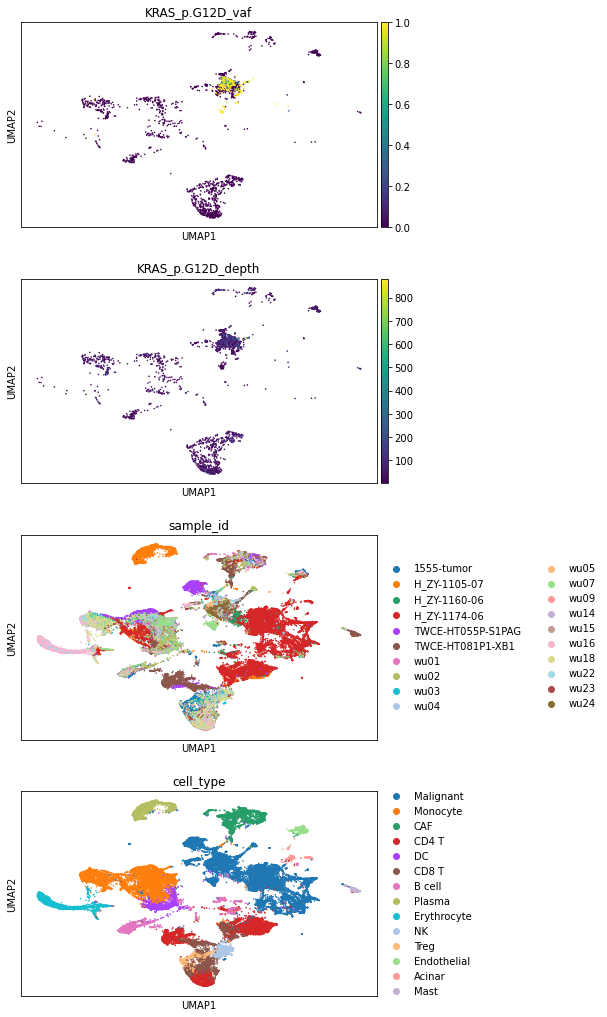

In [56]:
sc.pl.umap(adata,
           color=['KRAS_p.G12D_vaf', 'KRAS_p.G12D_depth', 'sample_id', 'cell_type'], ncols=1, size=10)

In [62]:
tumor = adata[adata.obs['cell_type']=='Malignant']
tumor = tumor[[True if 'wu' in c or '1555' in c else False for c in tumor.obs['sample_id']]]
tumor

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 3405 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.1.2', 'sample_id', 'cell_type', 'ABCA2_p.V804M_depth', 'ABCA2_p.V804M_vaf', 'ABCA2_p.V804M_status', 'ABCA6_p.R1261T_depth', 'ABCA6_p.R1261T_vaf', 'ABCA6_p.R1261T_status', 'ABCA8_p.X1183_splice_depth', 'ABCA8_p.X1183_splice_vaf', 'ABCA8_p.X1183_splice_status', 'ABCB11_p.R696P_depth', 'ABCB11_p.R696P_vaf', 'ABCB11_p.R696P_status', 'ABCB4_p.Q423Efs*13_depth', 'ABCB4_p.Q423Efs*13_vaf', 'ABCB4_p.Q423Efs*13_status', 'ABCC10_p.E314A_depth', 'ABCC10_p.E314A_vaf', 'ABCC10_p.E314A_status', 'ABCC8_p.S579Y_depth', 'ABCC8_p.S579Y_vaf', 'ABCC8_p.S579Y_status', 'ABCE1_p.K513Q_depth', 'ABCE1_p.K513Q_vaf', 'ABCE1_p.K513Q_status', 'ABCF1_p.K76Sfs*60_depth', 'ABCF1_p.K76Sfs*60_vaf', 'ABCF1_p.K76Sfs*60_status', 'ABCG2_p.K360del_depth', 'ABCG2_p.K360del_vaf', 'ABCG2_p.K360del_status', 'ABLIM3_p.L649Q_depth'

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'ABCA2_p.V804M_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCA6_p.R1261T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCA8_p.X1183_splice_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCB11_p.R696P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCB4_p.Q423Efs*13_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCC10_p.E314A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ABCC8_p.S579Y_status' as categorical
Trying to set attribute `.obs` of view, copying.
... st

Trying to set attribute `.obs` of view, copying.
... storing 'ATG16L1_p.L27P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATOH7_p.L86R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP12A_p.M694R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP1A2_p.V163L_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP2A1_p.E889G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP6V0A2_p.E442D_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP6V1C2_p.S316*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP7B_p.Y1331H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATP8B2_p.Q608H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ATR_p.L2332P_status' as categorical


Trying to set attribute `.obs` of view, copying.
... storing 'CHRNB4_p.V23M_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CHST15_p.P454R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CHSY1_p.A2V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CIZ1_p.E810D_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CKAP5_p.V1373I_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CLCN7_p.S102R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CLEC16A_p.Y346*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CLIC1_p.D159H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CLIC2_p.X134_splice_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'CLIP2_p.F279V_status' as categorical
Try

... storing 'DOC2A_p.E158K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DOCK3_p.E544K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DOCK5_p.F1571Lfs*19_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DOCK9_p.Q28K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DOPEY2_p.L493R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DPYS_p.Q151R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DRAM2_p.L33I_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DRC3_p.H88Gfs*8_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DRD5_p.A126T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'DSEL_p.Y114S_status' as categorical
Trying to set attribute `.obs` of view, copying.
... st

Trying to set attribute `.obs` of view, copying.
... storing 'FOCAD_p.W52_A65del_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOSL2_p.X119_splice_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOXD4L3_p.P235R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOXE1_p.A287T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOXO3_p.L382Afs*3_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOXO6_p.I97L_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FOXP2_p.T7K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FRG1_p.A148P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FRG1_p.M147Nfs*8_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'FTSJ1_p.R9Q_status' as categori

... storing 'HOXD9_p.V100G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HPR_p.G14V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HPSE_p.L252H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HS1BP3_p.N113K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HSD17B6_p.L54W_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HSPA13_p.G228R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HSPA14_p.E172A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HTR3B_p.P265L_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HUWE1_p.R1675*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'HYAL2_p.V96A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storin

Trying to set attribute `.obs` of view, copying.
... storing 'LCN15_p.S152A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LDB2_p.A358T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LDOC1L_p.R163C_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LIMK2_p.Y622H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LMTK2_p.L16del_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LRBA_p.L1376R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LRCH2_p.P698T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LRFN4_p.L10del_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LRRC16A_p.R706*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'LRRC63_p.T299N_status' as categorical
Tryin

... storing 'MYO1H_p.A825T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'MYO7B_p.E238G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'MYOCD_p.L943P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'MZF1_p.E492D_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NAA16_p.E63Kfs*38_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NAB2_p.F305L_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NACC2_p.Y337D_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NALCN_p.E932D_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NALCN_p.E932G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'NALCN_p.R43C_status' as categorical
Trying to set attribute `.obs` of view, copying.
... stori

Trying to set attribute `.obs` of view, copying.
... storing 'PDE8B_p.H688P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PDHX_p.T179K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PDPR_p.I312V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PDZRN3_p.G663S_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PDZRN3_p.R931H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PEX5L_p.R533*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PGM2L1_p.R178G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PGRMC1_p.D59Y_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PHF2_p.D46N_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PHF2_p.N403H_status' as categorical
Trying to se

... storing 'PUS7_p.K228T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PXDN_p.R728H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'PXMP2_p.D103H_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'QRICH2_p.L805W_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'R3HDM2_p.K222T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'RAB37_p.S208R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'RAB3GAP1_p.V226G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'RAC2_p.Y90*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'RAD51C_p.Q358K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'RAI1_p.E443A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... stori

... storing 'SMPD1_p.A38V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SMPD4_p.F484V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SMPD4_p.L437R_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SMPD4_p.R507*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SND1_p.E200Q_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SNED1_p.F907V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SOX10_p.A201T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SOX10_p.S423T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SOX9_p.P354_P360del_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SPEF2_p.X633_splice_status' as categorical
Trying to set attribute `.obs` of view, copying.


... storing 'TNRC18_p.S2564_S2565dup_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TNRC6A_p.N473K_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TNRC6A_p.T860P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.A159V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.C135*_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.G266E_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.L111P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.M246V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.P190T_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TP53_p.R280G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... s

Trying to set attribute `.obs` of view, copying.
... storing 'ZMYND8_p.D1040E_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF106_p.R160C_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF107_p.T132A_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF143_p.G631V_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF185_p.E165del_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF225_p.R389G_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF254_p.W653C_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF331_p.Q17P_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF335_p.T1146Nfs*9_status' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ZNF414_p.F145V_status' as categ

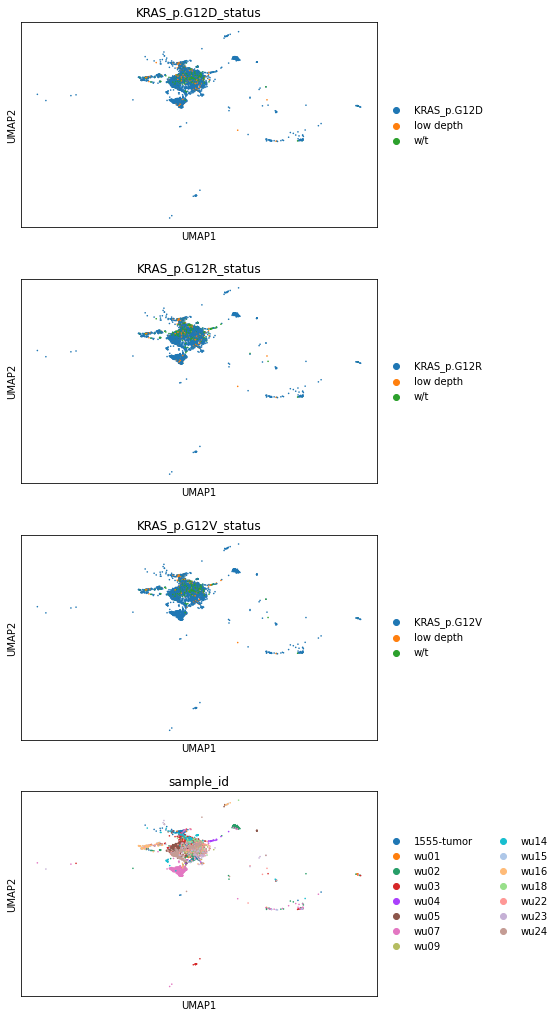

In [63]:
sc.pl.umap(tumor,
           color=['KRAS_p.G12D_status', 'KRAS_p.G12R_status', 'KRAS_p.G12V_status', 'sample_id'],
           ncols=1, size=10)

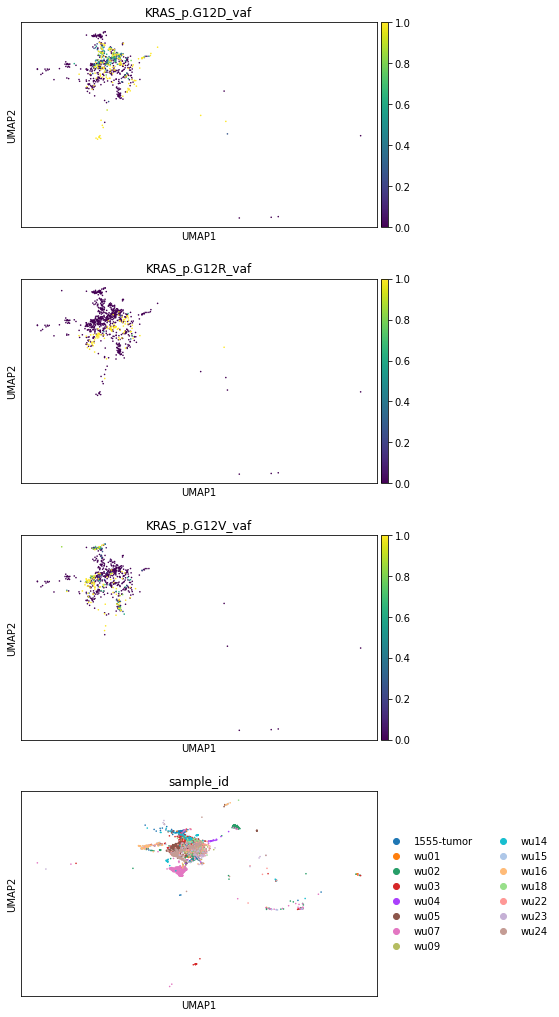

In [64]:
sc.pl.umap(tumor,
           color=['KRAS_p.G12D_vaf', 'KRAS_p.G12R_vaf', 'KRAS_p.G12V_vaf', 'sample_id'],
           ncols=1, size=10)

In [46]:
[c for c in adata.obs.columns if 'KRAS' in c]

['KRAS_p.G12D_depth',
 'KRAS_p.G12D_vaf',
 'KRAS_p.G12R_depth',
 'KRAS_p.G12R_vaf',
 'KRAS_p.G12V_depth',
 'KRAS_p.G12V_vaf']